In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
abalone=pd.read_csv("abalone.txt", sep=",", header=None, names=["sex", 'length', "diameter",
                                                       "height", "whole_weight",
                                                       "shucked_weight", "viscera_weight",
                                                       "shell_weight","rings"])
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
# 상관관계

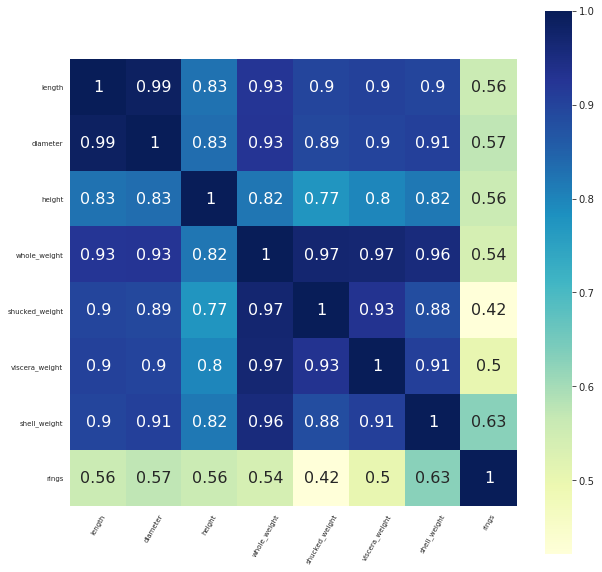

In [7]:
corr=abalone.corr()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(corr, square=True,cmap = "YlGnBu",annot = True,annot_kws = {"size" : 16})
    plt.xticks(rotation=60, size=7)
    plt.yticks(rotation=0, size=7)

In [8]:
numeric_featuers = abalone.dtypes[abalone.dtypes != "object"].index
print("numeric_featuers :", numeric_featuers)
category_featuers = abalone.dtypes[abalone.dtypes == "object"].index 
print("category_featuers : " ,category_featuers)

numeric_featuers : Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')
category_featuers :  Index(['sex'], dtype='object')


In [9]:
abalone.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


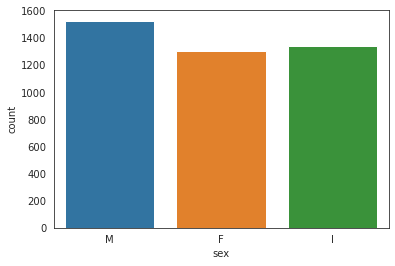

In [10]:
with sns.axes_style("white"):
    sns.countplot(x='sex', data = abalone)

In [11]:
abalone.groupby(abalone['sex']).mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [12]:
abalone.rings.value_counts(normalize=True)

9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: rings, dtype: float64

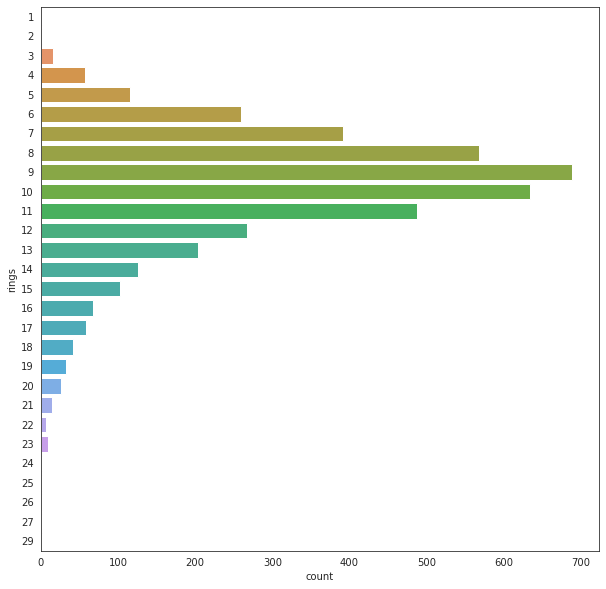

In [13]:
with sns.axes_style("white"):
    plt.subplots(figsize=(10,10))
    sns.countplot(y='rings', data = abalone)

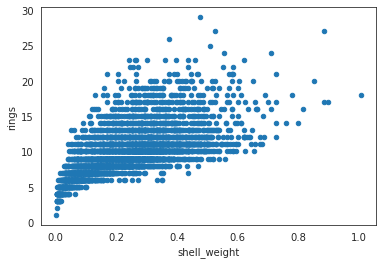

In [14]:
with sns.axes_style("white"):
    var='shell_weight'
    data=pd.concat([abalone['rings'],abalone[var]],axis=1)
    data.plot.scatter(x=var, y='rings')

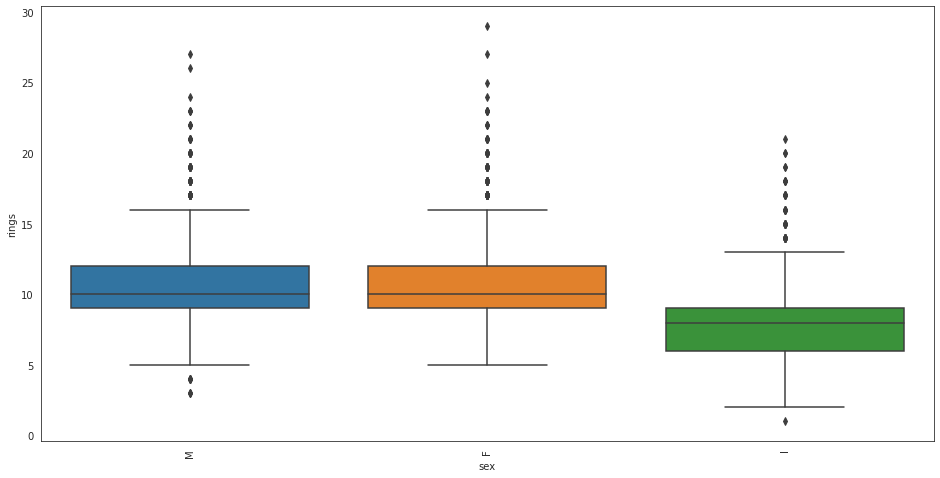

In [15]:
with sns.axes_style("white"):
    var='sex'
    data=pd.concat([abalone['rings'],abalone[var]],axis=1)
    f, ax=plt.subplots(figsize=(16,8))
    fig=sns.boxplot(x=var, y='rings', data=data)
    plt.xticks(rotation=90)

In [16]:
abalone["length_med"] = np.where(abalone["length"] > abalone["length"].median(), 
                                 "length_long", "length_short")
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_med
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long


In [17]:
# 상관관계가 높은 shell_weight 구간 나누어주기 
Q1 = abalone['shell_weight'].quantile(0.25)
Q3 = abalone['shell_weight'].quantile(0.75)

In [18]:
abalone['shell_weight_1']=np.where(abalone['shell_weight'] <= Q1,1,0)
abalone['shell_weight_2'] = np.where(((abalone['shell_weight'] > Q1) & (abalone['shell_weight'] <= Q3)),2,0)
abalone['shell_weight_3'] = np.where(abalone['shell_weight'] > Q3,3,0)

In [19]:
# 나이를 범위 나누어 줌
abalone['rings_1']=np.where(abalone['rings'] <= 8,1,0)
abalone['rings_2'] = np.where(((abalone['rings'] > 8) & (abalone['rings'] <= 11)),2,0)
abalone['rings_3'] = np.where(abalone['rings'] > 11,3,0)

In [20]:
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_med,shell_weight_1,shell_weight_2,shell_weight_3,rings_1,rings_2,rings_3
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short,0,2,0,0,0,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short,1,0,0,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short,0,2,0,0,2,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short,0,2,0,0,2,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long,0,2,0,0,2,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long,0,2,0,0,2,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long,0,2,0,0,2,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long,0,2,0,0,2,0


In [21]:
# 성별 원핫 인코딩
abalone = pd.get_dummies(abalone, dummy_na=True)

In [22]:
abalone

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,shell_weight_1,shell_weight_2,...,rings_1,rings_2,rings_3,sex_F,sex_I,sex_M,sex_nan,length_med_length_long,length_med_length_short,length_med_nan
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,2,...,0,0,3,0,0,1,0,0,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,2,...,0,2,0,1,0,0,0,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,2,...,0,2,0,0,0,1,0,0,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,2,...,0,2,0,1,0,0,0,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,2,...,0,2,0,0,0,1,0,1,0,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,2,...,0,2,0,0,0,1,0,1,0,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,2,...,0,2,0,1,0,0,0,1,0,0


In [23]:
Xtrain = abalone.drop(['rings'], axis = 1)
Ytrain = abalone['rings']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.3, random_state=20201005)

In [25]:
def rmsle(y,y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))

In [26]:
model = RandomForestRegressor(n_estimators=490, max_depth=9,random_state=20201005)
model.fit(Xtrain,Ytrain)
y_pred= model.predict(X_test)
print('score :',rmsle(Y_test,y_pred))

score : 0.07657365002029164


In [27]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(Y_test,y_pred))

0.07657365002029164